In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
import os

from ManagerUniverse import ManagerUniverse
import DataParser
import Entities
from tqdm import tqdm
import math


# Manager Universe

In [5]:
# Directory where your CSV files are stored
directory_path = "Data"
manager_files = os.listdir(directory_path)
len(manager_files)

32

In [6]:
returns_folder = 'Data'
start_date = "2003-01-01"
end_date = "2023-03-01"

test_start_date = "2023-04-01"
test_end_date = "2023-04-01"
# the para here can set to be the desired correlation.
universe = ManagerUniverse(0.3)

print("Initializing Universe...\n")
universe.populate_managers(returns_folder, start_date=start_date, end_date=end_date, test_start_date=test_start_date, test_end_date = test_end_date)

Initializing Universe...



In [7]:
print("Original Portfolio")
df_op = universe.original_portfolio()
df_op

Original Portfolio


,Breakout,Capstone Investment Advisors,Castlefield Associates,DCM Systematic,EMC Capital Advisors,Gibson Capital,Hidden Lake Asset Management,Incline Investment Management,Introspect Capital,J E Moody & Company,...,Opti Capital Management,Panview,PlusPlus Capital Management,QCAM Currency Asset Management,Quantica Capital,Rosetta_x,Rosetta_y,Teza_x,Teza_y,Trident
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,-0.0309,-0.0028,0.0313,0.0089,-0.096,0.0034,0.0234,-0.0686,-0.029,-0.0010,...,0.0167,-0.0040,-0.002,-0.0096,-0.058,0.0666,-0.0307,-0.0382,-0.0024,0.008
2022-12-01,0.0114,0.0215,0.0201,-0.0094,0.001,0.0624,0.0339,0.0003,-0.022,0.0010,...,0.0133,-0.0060,0.001,-0.0078,-0.015,-0.0572,-0.0091,-0.0511,-0.0629,-0.006
2023-01-01,0.0305,0.0226,-0.0037,-0.0113,-0.012,0.0004,0.0112,-0.0073,0.002,0.0006,...,0.0184,-0.0335,0.000,0.0151,0.001,-0.0442,0.0603,-0.0173,0.0343,0.007


In [8]:
print("\nAdded all Managers. Performing calculations...")
universe.perform_manager_stats_calculations()
print("\nFinished calculations. Correlating...")
universe.populate_clusters()


Added all Managers. Performing calculations...

Finished calculations. Correlating...


# Ratings and Test Return Portfolios

In [9]:
print("All clusters have been created. Calculating Scores and Weights for all managers...")
ratings_df = universe.ratings_df()
ratings_df

All clusters have been created. Calculating Scores and Weights for all managers...


,Omega Value,Omega Score,Sharpe Ratio,Sharpe Score,Drawdown Area,Drawdown Score,Score,Overall Score,weights,Vol Weights
Name,,,,,,,,,,
Breakout,1.479528,1,6.339291,2,-0.198482,4,0.500000,2,0.023042,0.017853
Capstone Investment Advisors,2.275427,4,13.623698,5,-0.053400,1,0.800000,4,0.036867,0.048281
Castlefield Associates,0.387200,1,-13.132862,1,-0.203938,4,0.222222,1,0.010241,0.030682
DCM Systematic,1.632309,3,7.418440,3,-0.091151,2,0.703704,3,0.032430,0.020254
EMC Capital Advisors,1.364809,1,4.330718,1,-0.317364,5,0.333333,1,0.015361,0.013660
Gibson Capital,2.474418,5,14.418835,5,-0.036421,1,1.000000,5,0.046084,0.049634
Hidden Lake Asset Management,1.561870,2,6.699620,2,-0.265321,5,1.000000,5,0.046084,0.012792
Incline Investment Management,1.310438,1,3.787060,1,-0.260149,5,0.291667,1,0.013441,0.013229
Introspect Capital,1.653847,3,7.563731,3,-0.240474,4,0.380952,1,0.017556,0.016191


In [10]:
print("\nThe return portfolio is as followed: ")
df_rp = universe.returns_portfolio()
df_rp.tail()


The return portfolio is as followed: 


,Breakout Returns,Capstone Investment Advisors Returns,Castlefield Associates Returns,DCM Systematic Returns,EMC Capital Advisors Returns,Gibson Capital Returns,Hidden Lake Asset Management Returns,Incline Investment Management Returns,Introspect Capital Returns,J E Moody & Company Returns,...,Opti Capital Management Returns,Panview Returns,PlusPlus Capital Management Returns,QCAM Currency Asset Management Returns,Quantica Capital Returns,Rosetta Returns_x,Rosetta Returns_y,Teza Returns_x,Teza Returns_y,Trident Returns
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.0454,0.006,-0.0104,-0.0074,0.088,0.0033,NaN,0.0621,0.037,-0.0006,...,0.0067,0.034,0.0,-0.0003,0.018,0.0108,-0.0566,0.0137,0.0143,0.001


In [11]:
df_rp_weight = universe.weighted_returns_portfolio()
df_rp_weight.tail()

,Breakout Weighted Returns,Capstone Investment Advisors Weighted Returns,Castlefield Associates Weighted Returns,DCM Systematic Weighted Returns,EMC Capital Advisors Weighted Returns,Gibson Capital Weighted Returns,Hidden Lake Asset Management Weighted Returns,Incline Investment Management Weighted Returns,Introspect Capital Weighted Returns,J E Moody & Company Weighted Returns,...,Opti Capital Management Weighted Returns,Panview Weighted Returns,PlusPlus Capital Management Weighted Returns,QCAM Currency Asset Management Weighted Returns,Quantica Capital Weighted Returns,Rosetta Weighted Returns_x,Rosetta Weighted Returns_y,Teza Weighted Returns_x,Teza Weighted Returns_y,Trident Weighted Returns
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.001046,0.000221,-0.000107,-0.00024,0.001352,0.000152,NaN,0.000835,0.00065,-0.000016,...,0.000176,0.000783,0.0,-0.000014,0.000323,0.000166,-0.002608,0.000631,0.000659,0.000031


In [12]:
df_vol_weight = universe.volatility_weighted_returns_portfolio()
df_vol_weight.tail()

,Breakout Weighted Returns,Capstone Investment Advisors Weighted Returns,Castlefield Associates Weighted Returns,DCM Systematic Weighted Returns,EMC Capital Advisors Weighted Returns,Gibson Capital Weighted Returns,Hidden Lake Asset Management Weighted Returns,Incline Investment Management Weighted Returns,Introspect Capital Weighted Returns,J E Moody & Company Weighted Returns,...,Opti Capital Management Weighted Returns,Panview Weighted Returns,PlusPlus Capital Management Weighted Returns,QCAM Currency Asset Management Weighted Returns,Quantica Capital Weighted Returns,Rosetta Weighted Returns_x,Rosetta Weighted Returns_y,Teza Weighted Returns_x,Teza Weighted Returns_y,Trident Weighted Returns
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.000811,0.00029,-0.000319,-0.00015,0.001202,0.000164,NaN,0.000822,0.000599,-0.000027,...,0.000328,0.000635,0.0,-0.000012,0.000345,0.000123,-0.000522,0.000277,0.000274,0.000019


In [13]:
df_eq_weight = universe.equal_weighted_returns_portfolio()
df_eq_weight.tail()

,Breakout Equal Weighted Returns,Capstone Investment Advisors Equal Weighted Returns,Castlefield Associates Equal Weighted Returns,DCM Systematic Equal Weighted Returns,EMC Capital Advisors Equal Weighted Returns,Gibson Capital Equal Weighted Returns,Hidden Lake Asset Management Equal Weighted Returns,Incline Investment Management Equal Weighted Returns,Introspect Capital Equal Weighted Returns,J E Moody & Company Equal Weighted Returns,...,Opti Capital Management Equal Weighted Returns,Panview Equal Weighted Returns,PlusPlus Capital Management Equal Weighted Returns,QCAM Currency Asset Management Equal Weighted Returns,Quantica Capital Equal Weighted Returns,Rosetta Equal Weighted Returns_x,Rosetta Equal Weighted Returns_y,Teza Equal Weighted Returns_x,Teza Equal Weighted Returns_y,Trident Equal Weighted Returns
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.001419,0.000188,-0.000325,-0.000231,0.00275,0.000103,NaN,0.001941,0.001156,-0.000019,...,0.000209,0.001063,0.0,-0.000009,0.000562,0.000338,-0.001769,0.000428,0.000447,0.000031


# Analysis

In [14]:
df_rp_weight

,Breakout Weighted Returns,Capstone Investment Advisors Weighted Returns,Castlefield Associates Weighted Returns,DCM Systematic Weighted Returns,EMC Capital Advisors Weighted Returns,Gibson Capital Weighted Returns,Hidden Lake Asset Management Weighted Returns,Incline Investment Management Weighted Returns,Introspect Capital Weighted Returns,J E Moody & Company Weighted Returns,...,Opti Capital Management Weighted Returns,Panview Weighted Returns,PlusPlus Capital Management Weighted Returns,QCAM Currency Asset Management Weighted Returns,Quantica Capital Weighted Returns,Rosetta Weighted Returns_x,Rosetta Weighted Returns_y,Teza Weighted Returns_x,Teza Weighted Returns_y,Trident Weighted Returns
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.001046,0.000221,-0.000107,-0.00024,0.001352,0.000152,NaN,0.000835,0.00065,-0.000016,...,0.000176,0.000783,0.0,-0.000014,0.000323,0.000166,-0.002608,0.000631,0.000659,0.000031


# Loop

In [15]:
df_vol_weight

,Breakout Weighted Returns,Capstone Investment Advisors Weighted Returns,Castlefield Associates Weighted Returns,DCM Systematic Weighted Returns,EMC Capital Advisors Weighted Returns,Gibson Capital Weighted Returns,Hidden Lake Asset Management Weighted Returns,Incline Investment Management Weighted Returns,Introspect Capital Weighted Returns,J E Moody & Company Weighted Returns,...,Opti Capital Management Weighted Returns,Panview Weighted Returns,PlusPlus Capital Management Weighted Returns,QCAM Currency Asset Management Weighted Returns,Quantica Capital Weighted Returns,Rosetta Weighted Returns_x,Rosetta Weighted Returns_y,Teza Weighted Returns_x,Teza Weighted Returns_y,Trident Weighted Returns
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.000811,0.00029,-0.000319,-0.00015,0.001202,0.000164,NaN,0.000822,0.000599,-0.000027,...,0.000328,0.000635,0.0,-0.000012,0.000345,0.000123,-0.000522,0.000277,0.000274,0.000019


# Entire Code Loop

In [19]:
date_range = pd.date_range(start='2022-01-01', end='2023-06-01', freq='MS')

EMP_df = pd.DataFrame()
vol_df = pd.DataFrame()
equal_df = pd.DataFrame()
weighted_df = pd.DataFrame()

for i in tqdm(range(len(date_range) - 1)):
    returns_folder = 'Data'
    start_date = "2003-01-01"    
    end_date = date_range[i].strftime('%Y-%m-%d')
    
    test_start_date = date_range[i + 1].strftime('%Y-%m-%d')    
    test_end_date = test_start_date
    
    print(f"Processing period: Start date = {start_date}, End date = {end_date}, Test start date = {test_start_date}, Test end date = {test_end_date}")
    universe = ManagerUniverse(0.3)

    #print("Initializing Universe...\n")
    universe.populate_managers(returns_folder, start_date=start_date, end_date=end_date, test_start_date=test_start_date, test_end_date = test_end_date)

    #print("\nAdded all Managers. Performing calculations...")
    universe.perform_manager_stats_calculations()
    #print("\nFinished calculations. Correlating...")
    universe.populate_clusters()
    #print("All clusters have been created. Calculating Scores and Weights for all managers...")
    ratings_df = universe.ratings_df()

    #print("\nThe return portfolio is as followed: ")
    df_rp = universe.returns_portfolio()
    df_rp_weight = universe.weighted_returns_portfolio()
    df_vol_weight = universe.volatility_weighted_returns_portfolio()
    df_eq_weight = universe.equal_weighted_returns_portfolio()
        
    EMP_df = pd.concat([EMP_df, df_rp_weight])
    vol_df = pd.concat([vol_df, df_vol_weight])
    equal_df = pd.concat([equal_df, df_eq_weight])

    weighted_df = pd.concat([weighted_df, ratings_df])    


  0%|          | 0/17 [00:00<?, ?it/s]

Processing period: Start date = 2003-01-01, End date = 2022-01-01, Test start date = 2022-02-01, Test end date = 2022-02-01


  6%|▌         | 1/17 [00:00<00:14,  1.08it/s]

Processing period: Start date = 2003-01-01, End date = 2022-02-01, Test start date = 2022-03-01, Test end date = 2022-03-01


 12%|█▏        | 2/17 [00:02<00:18,  1.22s/it]

Processing period: Start date = 2003-01-01, End date = 2022-03-01, Test start date = 2022-04-01, Test end date = 2022-04-01


 18%|█▊        | 3/17 [00:03<00:16,  1.21s/it]

Processing period: Start date = 2003-01-01, End date = 2022-04-01, Test start date = 2022-05-01, Test end date = 2022-05-01


 24%|██▎       | 4/17 [00:04<00:15,  1.19s/it]

Processing period: Start date = 2003-01-01, End date = 2022-05-01, Test start date = 2022-06-01, Test end date = 2022-06-01


 29%|██▉       | 5/17 [00:06<00:14,  1.23s/it]

Processing period: Start date = 2003-01-01, End date = 2022-06-01, Test start date = 2022-07-01, Test end date = 2022-07-01


 35%|███▌      | 6/17 [00:07<00:13,  1.20s/it]

Processing period: Start date = 2003-01-01, End date = 2022-07-01, Test start date = 2022-08-01, Test end date = 2022-08-01


 41%|████      | 7/17 [00:08<00:12,  1.25s/it]

Processing period: Start date = 2003-01-01, End date = 2022-08-01, Test start date = 2022-09-01, Test end date = 2022-09-01


 47%|████▋     | 8/17 [00:09<00:11,  1.26s/it]

Processing period: Start date = 2003-01-01, End date = 2022-09-01, Test start date = 2022-10-01, Test end date = 2022-10-01


 53%|█████▎    | 9/17 [00:11<00:10,  1.25s/it]

Processing period: Start date = 2003-01-01, End date = 2022-10-01, Test start date = 2022-11-01, Test end date = 2022-11-01


 59%|█████▉    | 10/17 [00:12<00:09,  1.29s/it]

Processing period: Start date = 2003-01-01, End date = 2022-11-01, Test start date = 2022-12-01, Test end date = 2022-12-01


 65%|██████▍   | 11/17 [00:13<00:07,  1.32s/it]

Processing period: Start date = 2003-01-01, End date = 2022-12-01, Test start date = 2023-01-01, Test end date = 2023-01-01


 71%|███████   | 12/17 [00:15<00:06,  1.33s/it]

Processing period: Start date = 2003-01-01, End date = 2023-01-01, Test start date = 2023-02-01, Test end date = 2023-02-01


 76%|███████▋  | 13/17 [00:16<00:05,  1.47s/it]

Processing period: Start date = 2003-01-01, End date = 2023-02-01, Test start date = 2023-03-01, Test end date = 2023-03-01


 82%|████████▏ | 14/17 [00:18<00:04,  1.64s/it]

Processing period: Start date = 2003-01-01, End date = 2023-03-01, Test start date = 2023-04-01, Test end date = 2023-04-01


 88%|████████▊ | 15/17 [00:20<00:03,  1.63s/it]

Processing period: Start date = 2003-01-01, End date = 2023-04-01, Test start date = 2023-05-01, Test end date = 2023-05-01


 94%|█████████▍| 16/17 [00:21<00:01,  1.57s/it]

Processing period: Start date = 2003-01-01, End date = 2023-05-01, Test start date = 2023-06-01, Test end date = 2023-06-01


100%|██████████| 17/17 [00:23<00:00,  1.37s/it]


EMP Weights: {'Total Return (%)': 0.09632496259142687, 'Annualized Return (%)': 0.07140699412787455, 'Annualized Std Dev (%)': 0.027849345717573974, 'Sharpe Ratio': 1.4868210746418071}
Vol Weights: {'Total Return (%)': 0.07438381977101072, 'Annualized Return (%)': 0.05528458540274461, 'Annualized Std Dev (%)': 0.019324789265436966, 'Sharpe Ratio': 1.3084016107729022}
Equal Weights: {'Total Return (%)': 0.1239065506430923, 'Annualized Return (%)': 0.09156009855906477, 'Annualized Std Dev (%)': 0.037016364397920276, 'Sharpe Ratio': 1.6630509116806582}


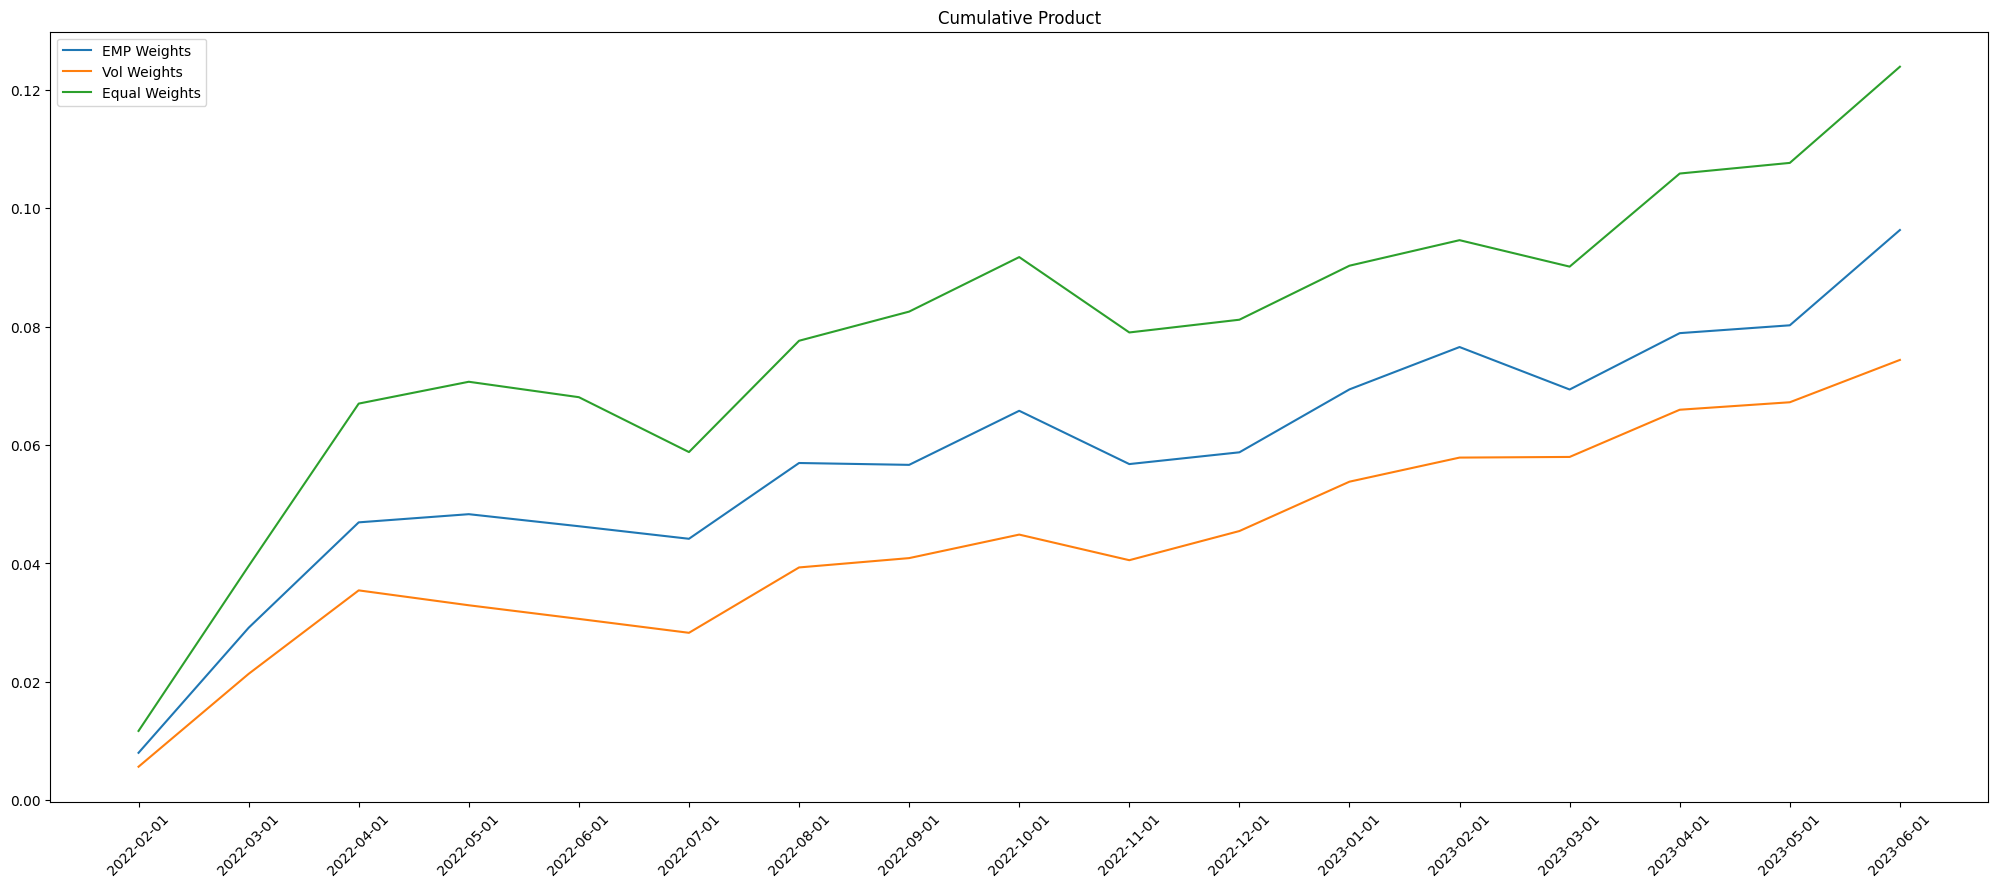

In [17]:
df_list = [EMP_df, vol_df, equal_df]
ManagerUniverse.Portfolio_Performance(df_list)

In [18]:
weighted_df

,Omega Value,Omega Score,Sharpe Ratio,Sharpe Score,Drawdown Area,Drawdown Score,Score,Overall Score,weights,Vol Weights
Name,,,,,,,,,,
Breakout,1.392650,2,5.458313,2,-0.198482,4,0.333333,2,0.015714,0.019816
Capstone Investment Advisors,2.496450,4,14.632999,5,-0.053400,1,0.800000,4,0.037714,0.047698
Castlefield Associates,0.185173,1,-21.564049,1,-0.122481,3,0.291667,1,0.013750,0.031713
DCM Systematic,1.637210,3,7.472746,3,-0.091151,2,0.600000,3,0.028286,0.019299
EMC Capital Advisors,1.387982,1,4.645212,2,-0.317364,5,0.333333,2,0.015714,0.014089
...,...,...,...,...,...,...,...,...,...,...
Rosetta,1.501162,2,5.316419,2,-0.249111,4,0.333333,1,0.015304,0.011402
Rosetta,1.449532,2,5.169538,1,-0.213397,4,1.000000,5,0.045911,0.009249
Teza,1.583646,3,7.273600,3,-0.114288,3,1.000000,5,0.045911,0.020478
